# Introduction:

![](https://media.istockphoto.com/id/1487894858/photo/candlestick-chart-and-data-of-financial-market.jpg?s=1024x1024&w=is&k=20&c=AfDUACB1NMYPpuvEgEgQDUNt2rMuCsPoLnfH0LSYs1s=)

 In this notebook we explore the dynamics of the Indian stock market, identifying the growing sectors and top performers. Also analyzing the market's stability (3 months)

In [ ]:
# building dependencies First
! pip install yfinance

In [3]:
# Importing essential Libraries
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb
import plotly
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)

# Nifty:

The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange.

Nifty will serve as a good starting point to start our Analysis.

In [4]:
# To get data just follow these steps
tkrObj = yf.Ticker('^NSEI')

# Downloading historical data (3 months)
# the returned obj is a pandas data frame
data = tkrObj.history(start = '2024-02-01', end = '2024-05-1')
data[0:10]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-01 00:00:00+05:30,21780.650391,21832.949219,21658.750000,21697.449219,332500,0.0,0.0
2024-02-02 00:00:00+05:30,21812.750000,22126.800781,21805.550781,21853.800781,442800,0.0,0.0
2024-02-05 00:00:00+05:30,21921.050781,21964.300781,21726.949219,21771.699219,440800,0.0,0.0
2024-02-06 00:00:00+05:30,21825.199219,21951.400391,21737.550781,21929.400391,371000,0.0,0.0
2024-02-07 00:00:00+05:30,22045.050781,22053.300781,21860.150391,21930.500000,346300,0.0,0.0
2024-02-08 00:00:00+05:30,22009.650391,22011.050781,21665.300781,21717.949219,491100,0.0,0.0
2024-02-09 00:00:00+05:30,21727.000000,21804.449219,21629.900391,21782.500000,349200,0.0,0.0
2024-02-12 00:00:00+05:30,21800.800781,21831.699219,21574.750000,21616.050781,287400,0.0,0.0
2024-02-13 00:00:00+05:30,21664.300781,21766.800781,21543.349609,21743.250000,365800,0.0,0.0


# Making Analysis Easy:

To make our Analysis a bit easy we will be considering Net gains for ie Close - Open and % gain i.e (Close - Open)/Close * 100

In [5]:
data['Gains'] = data['Close'] - data['Open']
data['PercentageGain'] = ((data['Close'] - data['Open'])/ data['Open']) * 100

data[0:10]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gains,PercentageGain
Date,,,,,,,,,
2024-02-01 00:00:00+05:30,21780.650391,21832.949219,21658.750000,21697.449219,332500,0.0,0.0,-83.201172,-0.381996
2024-02-02 00:00:00+05:30,21812.750000,22126.800781,21805.550781,21853.800781,442800,0.0,0.0,41.050781,0.188196
2024-02-05 00:00:00+05:30,21921.050781,21964.300781,21726.949219,21771.699219,440800,0.0,0.0,-149.351562,-0.681316
2024-02-06 00:00:00+05:30,21825.199219,21951.400391,21737.550781,21929.400391,371000,0.0,0.0,104.201172,0.477435
2024-02-07 00:00:00+05:30,22045.050781,22053.300781,21860.150391,21930.500000,346300,0.0,0.0,-114.550781,-0.519621
2024-02-08 00:00:00+05:30,22009.650391,22011.050781,21665.300781,21717.949219,491100,0.0,0.0,-291.701172,-1.325333
2024-02-09 00:00:00+05:30,21727.000000,21804.449219,21629.900391,21782.500000,349200,0.0,0.0,55.500000,0.255443
2024-02-12 00:00:00+05:30,21800.800781,21831.699219,21574.750000,21616.050781,287400,0.0,0.0,-184.750000,-0.847446
2024-02-13 00:00:00+05:30,21664.300781,21766.800781,21543.349609,21743.250000,365800,0.0,0.0,78.949219,0.364421


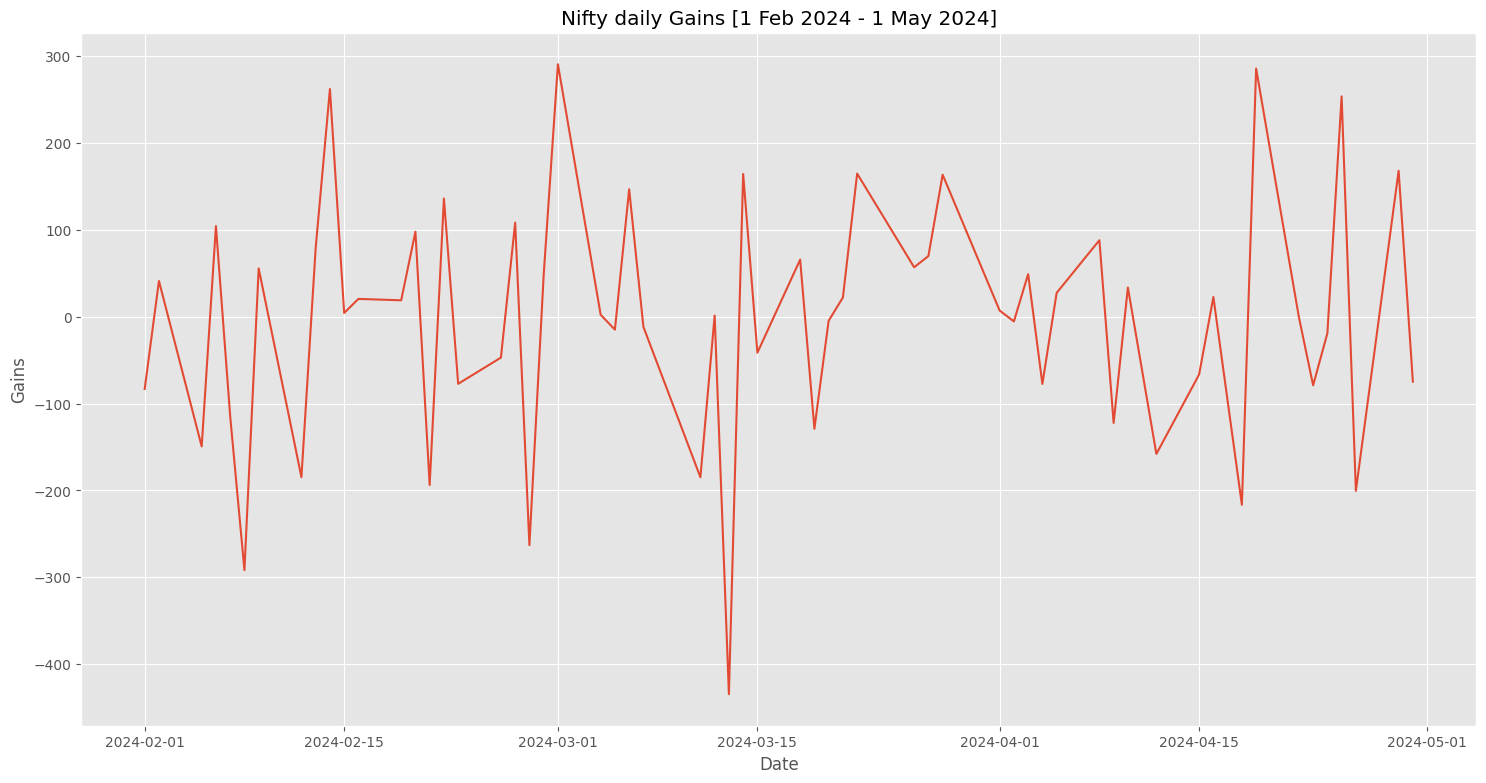

In [7]:
# let visualize this data
plt.figure(figsize = (18, 9))
sb.lineplot(data = data, x = 'Date', y = 'Gains')
plt.grid(True)
plt.title('Nifty daily Gains [1 Feb 2024 - 1 May 2024]')
plt.show()

In [13]:
# For Your and mine Convinence I am adding a Interactive Plotly Plot as well
fig = go.Figure([go.Scatter(x=data.index, y=data['Gains'])])
fig.show()

In [8]:
data['sevenDayRollingMean'] = data['Gains'].rolling(7).mean()
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gains,PercentageGain,sevenDayRollingMean
Date,,,,,,,,,,
2024-02-01 00:00:00+05:30,21780.650391,21832.949219,21658.750000,21697.449219,332500,0.0,0.0,-83.201172,-0.381996,NaN
2024-02-02 00:00:00+05:30,21812.750000,22126.800781,21805.550781,21853.800781,442800,0.0,0.0,41.050781,0.188196,NaN
2024-02-05 00:00:00+05:30,21921.050781,21964.300781,21726.949219,21771.699219,440800,0.0,0.0,-149.351562,-0.681316,NaN
2024-02-06 00:00:00+05:30,21825.199219,21951.400391,21737.550781,21929.400391,371000,0.0,0.0,104.201172,0.477435,NaN
2024-02-07 00:00:00+05:30,22045.050781,22053.300781,21860.150391,21930.500000,346300,0.0,0.0,-114.550781,-0.519621,NaN
2024-02-08 00:00:00+05:30,22009.650391,22011.050781,21665.300781,21717.949219,491100,0.0,0.0,-291.701172,-1.325333,NaN
2024-02-09 00:00:00+05:30,21727.000000,21804.449219,21629.900391,21782.500000,349200,0.0,0.0,55.500000,0.255443,-62.578962
2024-02-12 00:00:00+05:30,21800.800781,21831.699219,21574.750000,21616.050781,287400,0.0,0.0,-184.750000,-0.847446,-77.085938
2024-02-13 00:00:00+05:30,21664.300781,21766.800781,21543.349609,21743.250000,365800,0.0,0.0,78.949219,0.364421,-71.671875


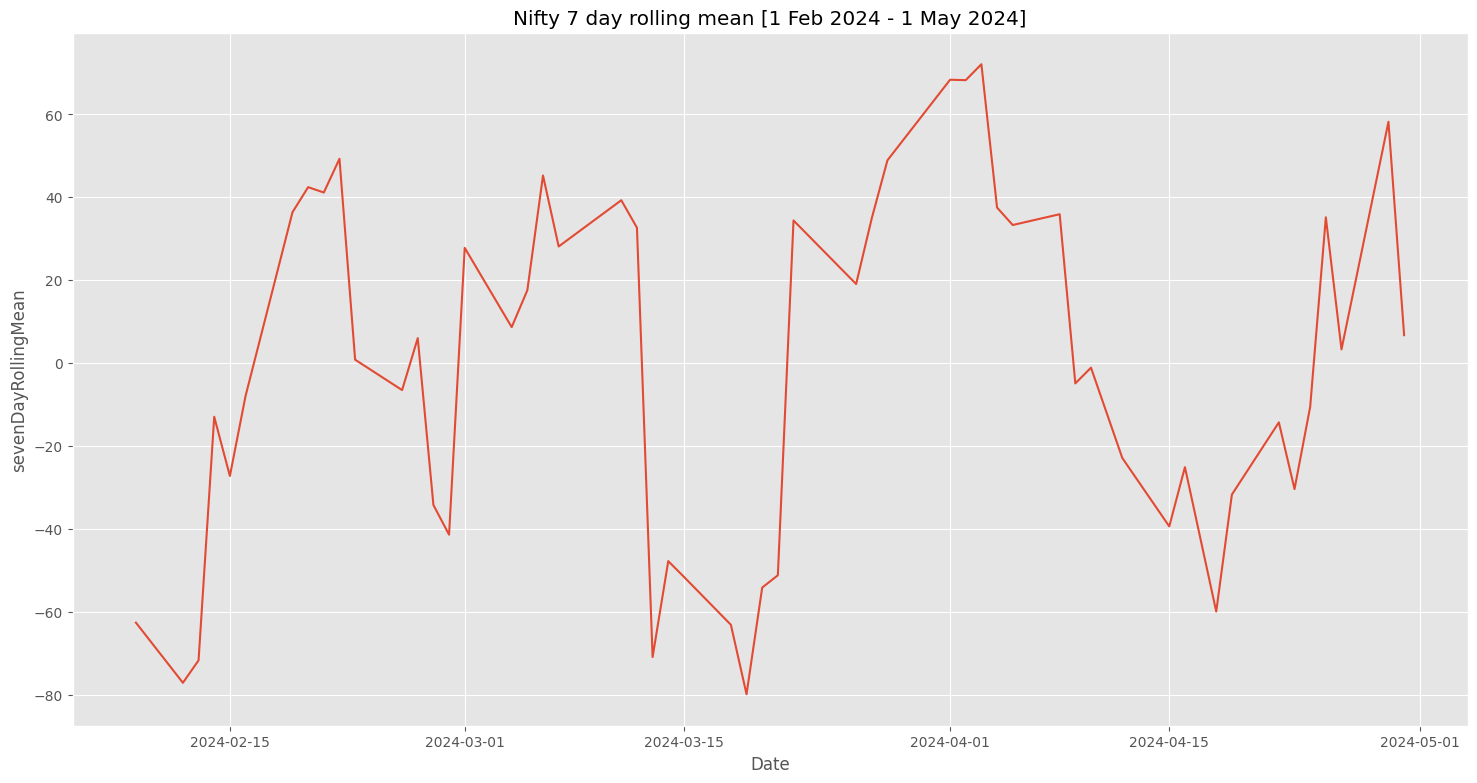

In [10]:
plt.figure(figsize = (18, 9))
sb.lineplot(data = data, x = 'Date', y = 'sevenDayRollingMean')
plt.grid(True)
plt.title('Nifty 7 day rolling mean [1 Feb 2024 - 1 May 2024]')
plt.show()


fig = go.Figure([go.Scatter(x=data.index, y=data['sevenDayRollingMean'])])
fig.show()

# Volume Bought and Sold and Concept of Over-Selling and Under-Selling

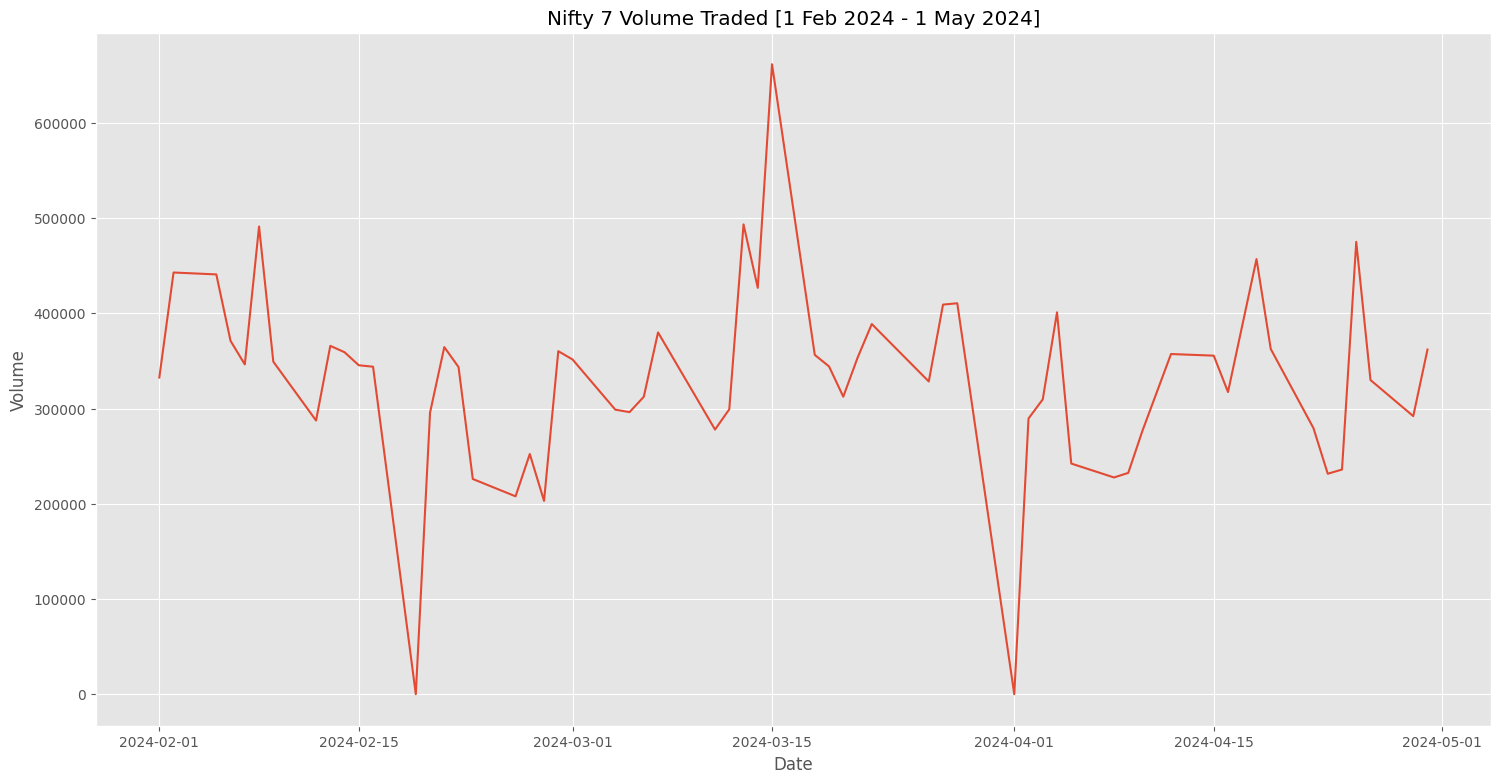

In [11]:
plt.figure(figsize = (18, 9))
sb.lineplot(data = data, x = 'Date', y = 'Volume')
plt.grid(True)
plt.title('Nifty 7 Volume Traded [1 Feb 2024 - 1 May 2024]')
plt.show()


fig = go.Figure([go.Scatter(x=data.index, y=data['Volume'])])
fig.show()

In [ ]:
####################################################################
# To Do: Continue our Analysis                                     #
####################################################################

####################################################################
# Thanks for Readaing Will be adding more to this notebook shortly #
####################################################################